In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Check version of tensorflow

In [3]:
import tensorflow as tf
tf.__version__

'2.17.1'

In [4]:
cd /content/drive/MyDrive/Nhan-dien-bien-bao

/content/drive/MyDrive/Nhan-dien-bien-bao


In [5]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [6]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=f23d0e7b2e362bdd2e878feb5207da012aadbb6545667a4bd521d7b8e3786d43
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [7]:
import wget
wget.download(link)

'traffic-signs-data.zip'

In [8]:
data = "./"
!unzip -q traffic-signs-data.zip -d $data

In [9]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [36]:
import pickle

with open(train_link,mode ="rb") as f:
  train = pickle.load(f)

In [37]:
with open(test_link, mode = "rb") as f:
  test = pickle.load(f)

In [38]:
with open(valid_link,mode = "rb") as f:
  valid = pickle.load(f)

In [14]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [16]:
trainX = train["features"]
trainY = train["labels"]

In [18]:
trainX.shape

(34799, 32, 32, 3)

array([[[28, 25, 24],
        [27, 24, 23],
        [27, 24, 22],
        ...,
        [32, 28, 24],
        [31, 27, 25],
        [31, 27, 26]],

       [[29, 26, 25],
        [27, 25, 23],
        [27, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       [[28, 26, 26],
        [27, 25, 23],
        [26, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       ...,

       [[27, 24, 23],
        [28, 25, 24],
        [30, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [29, 25, 22]],

       [[28, 23, 23],
        [29, 24, 24],
        [31, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [28, 24, 21]],

       [[29, 23, 23],
        [30, 24, 24],
        [32, 24, 23],
        ...,
        [27, 24, 22],
        [27, 23, 21],
        [26, 22, 20]]], dtype=uint8)
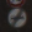

In [19]:
trainX[0]

In [41]:
validX = valid["features"]
validY = valid["labels"]

In [42]:
testX = test["features"]
testY = test["labels"]

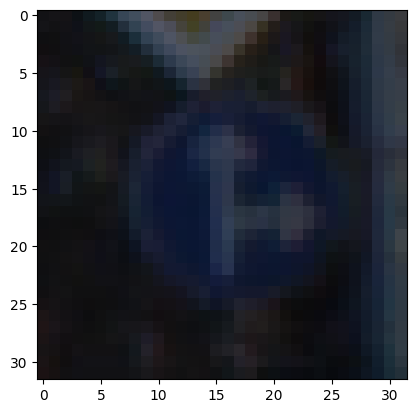

In [23]:
import matplotlib.pyplot as plt
plt.imshow(trainX[1000])

In [25]:
classNames = {
    0: 'Giới hạn tốc độ (20km/h)',
    1: 'Giới hạn tốc độ (30km/h)',
    2: 'Giới hạn tốc độ (50km/h)',
    3: 'Giới hạn tốc độ (60km/h)',
    4: 'Giới hạn tốc độ (70km/h)',
    5: 'Giới hạn tốc độ (80km/h)',
    6: 'Hết hạn chế tốc độ (80km/h)',
    7: 'Giới hạn tốc độ (100km/h)',
    8: 'Giới hạn tốc độ (120km/h)',
    9: 'Cấm vượt',
    10: 'Cấm vượt đối với xe tải trên 3.5 tấn',
    11: 'Được ưu tiên ở ngã tư tiếp theo',
    12: 'Đường ưu tiên',
    13: 'Nhường đường',
    14: 'Dừng lại',
    15: 'Cấm các loại xe',
    16: 'Cấm xe tải trên 3.5 tấn',
    17: 'Cấm đi vào',
    18: 'Chú ý nguy hiểm',
    19: 'Chỗ ngoặt nguy hiểm vòng sang trái',
    20: 'Chỗ ngoặt nguy hiểm vòng sang phải',
    21: 'Chỗ ngoặt nguy hiểm liên tiếp',
    22: 'Đường không bằng phẳng',
    23: 'Đường trơn',
    24: 'Đường hẹp về bên phải',
    25: 'Công trường đang thi công',
    26: 'Tín hiệu giao thông phía trước',
    27: 'Đường dành cho người đi bộ',
    28: 'Khu vực trẻ em qua đường',
    29: 'Chú ý xe đạp băng qua đường',
    30: 'Cảnh báo có băng/tuyết',
    31: 'Cảnh báo động vật hoang dã băng qua đường',
    32: 'Hết mọi giới hạn tốc độ và cấm vượt',
    33: 'Rẽ phải phía trước',
    34: 'Rẽ trái phía trước',
    35: 'Chỉ được đi thẳng',
    36: 'Đi thẳng hoặc rẽ phải',
    37: 'Đi thẳng hoặc rẽ trái',
    38: 'Đi về bên phải',
    39: 'Đi về bên trái',
    40: 'Vòng xuyến bắt buộc',
    41: 'Hết cấm vượt',
    42: 'Hết cấm vượt đối với xe tải trên 3.5 tấn'
}


In [31]:
classNames[trainY[1000]]

'Đi thẳng hoặc rẽ phải'

In [32]:
from sklearn.utils import shuffle
trainX, trainY = shuffle(trainX, trainY)

array([[[39, 39, 45],
        [39, 39, 45],
        [38, 37, 43],
        ...,
        [33, 32, 38],
        [34, 34, 42],
        [37, 37, 44]],

       [[41, 41, 48],
        [38, 38, 45],
        [39, 38, 45],
        ...,
        [33, 33, 39],
        [33, 33, 41],
        [37, 36, 42]],

       [[40, 40, 47],
        [39, 38, 45],
        [39, 37, 44],
        ...,
        [33, 32, 39],
        [34, 33, 40],
        [35, 33, 39]],

       ...,

       [[19, 19, 18],
        [19, 19, 18],
        [21, 20, 19],
        ...,
        [18, 18, 18],
        [19, 19, 17],
        [18, 18, 16]],

       [[20, 20, 19],
        [20, 20, 19],
        [20, 19, 19],
        ...,
        [19, 18, 18],
        [19, 19, 18],
        [18, 19, 18]],

       [[21, 21, 20],
        [20, 20, 19],
        [20, 19, 19],
        ...,
        [17, 17, 16],
        [18, 18, 17],
        [20, 20, 20]]], dtype=uint8)
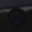

In [33]:
trainX[1000]

In [43]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") /255.0
testX = testX.astype("float") / 255.0

In [44]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)


In [45]:
valid["labels"][0]

41

In [47]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [136]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [137]:
model = Sequential()

In [138]:
width = 32
height = 32
classes = 43

In [139]:
shape = (width , height, 3)

In [140]:
model.add(Conv2D(32, (3, 3), padding ="same", input_shape = shape))
model.add(Activation("relu"))#Activation fuction
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding ="same"))
model.add(Activation("relu"))#Activation fuction
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3, 3), padding ="same"))
model.add(Activation("relu"))#Activation fuction
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding ="same"))
model.add(Activation("relu"))#Activation fuction
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())

model.add(Dense(classes))
model.add(Activation("softmax"))

In [141]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_48 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_49 (Activation)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_50 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_51 (Activation)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_52 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_48               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 43)                  │          22,0

 Total params: 2,188,107 (8.35 MB)

 Trainable params: 2,186,699 (8.34 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [142]:
augument = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range = 0.2, height_shift_range =0.2,fill_mode="nearest", horizontal_flip=True)

In [143]:
learning_rate = 0.01
epochs = 10
batch_size = 64

In [144]:
def scheduler(epoch, lr):
    return lr * 0.9 if epoch > 1 else lr
lr_callback = LearningRateScheduler(scheduler)

early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

In [145]:
opt = SGD(learning_rate = learning_rate, momentum=0.9)

In [146]:
model.compile(optimizer=opt, loss ="categorical_crossentropy", metrics = ["accuracy"])

In [147]:
print("Start training")
model_VGG16 = model.fit(augument.flow(trainX, trainY, batch_size = batch_size), validation_data = (validX, validY),steps_per_epoch = int(trainX.shape[0]/batch_size),epochs = epochs , callbacks=[lr_callback, early_stop],verbose = 1)


Start training
Epoch 1/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 243s 444ms/step - accuracy: 0.2785 - loss: 2.7227 - val_accuracy: 0.4989 - val_loss: 1.7456 - learning_rate: 0.0100
Epoch 2/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7344 - loss: 0.9341 - val_accuracy: 0.5005 - val_loss: 1.7482 - learning_rate: 0.0100
Epoch 3/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 253s 443ms/step - accuracy: 0.6826 - loss: 0.9496 - val_accuracy: 0.6009 - val_loss: 1.3356 - learning_rate: 0.0090
Epoch 4/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7500 - loss: 0.6912 - val_accuracy: 0.6039 - val_loss: 1.3286 - learning_rate: 0.0081
Epoch 5/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 239s 439ms/step - accuracy: 0.8549 - loss: 0.4410 - val_accuracy: 0.7410 - val_loss: 0.9153 - learning_rate: 0.0073
Epoch 6/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8906 - loss: 0.3066 - val_accuracy: 0.7426 - val_loss: 0.9163 - learning_rate: 0.0066
Epoch 7/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 253s 435ms/step - 

### SAVE MODEL

In [150]:
model.save("vgg16.h5")

### LOADING MODEL AND PREDICTION

In [160]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
import os

# Đường dẫn tới ảnh
image_path = "/content/drive/MyDrive/Nhan-dien-bien-bao/re-phai-phia-truoc.jpeg"  # Thay bằng đường dẫn ảnh của bạn
model_path = "/content/drive/MyDrive/Nhan-dien-bien-bao/vgg16.h5"  # Thay bằng đường dẫn đến mô hình đã lưu

# Load mô hình đã huấn luyện
model = load_model(model_path)

# Hàm xử lý ảnh
def preprocess_image(image_path, target_size=(32, 32)):
    img = Image.open(image_path).convert('RGB')  # Mở ảnh và chuyển đổi sang RGB
    img = img.resize(target_size)  # Resize ảnh
    img_array = np.array(img) / 255.0  # Chuẩn hóa giá trị pixel
    img_array = np.expand_dims(img_array, axis=0)  # Thêm batch dimension
    return img_array

# Hàm dự đoán
def predict_image(model, img_array, classNames):
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Lấy nhãn có xác suất cao nhất
    confidence = np.max(predictions)  # Lấy xác suất cao nhất
    return classNames[predicted_class], confidence

# Xử lý và dự đoán ảnh
try:
    img_array = preprocess_image(image_path)
    predicted_class, confidence = predict_image(model, img_array, classNames)
    print(f"Predicted Class: {predicted_class} \nConfidence: {confidence:.2f}")
except Exception as e:
    print(f"Error: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Predicted Class: Rẽ phải phía trước 
Confidence: 0.68
